<a href="https://colab.research.google.com/github/OH1107/edu/blob/master/fintech/20200916_AnaCJenm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
dbname='NaverStock.db'
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [ ]:
whr='where SDAY>20200101 and SCODE="028150" order by SDAY  asc limit 250'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfgs=pd.DataFrame(data=res,columns=cols)
dfgs.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,148600,148600,146400,146500,14920
1,20200103,148200,148200,145800,145800,16373
2,20200106,145700,146400,143000,143000,16978
3,20200107,142700,144400,141200,142000,12613
4,20200108,141800,141800,138100,139400,21254


In [ ]:
whr='where SDAY>20200101 and SCODE="035760" order by SDAY  asc limit 250'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df=pd.DataFrame(data=res,columns=cols)
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,159300,159400,151000,155600,125376
1,20200103,155800,157500,153100,154700,98855
2,20200106,153000,153900,150200,150200,78272
3,20200107,150300,154600,150300,154600,65431
4,20200108,152700,153200,150700,151300,75841


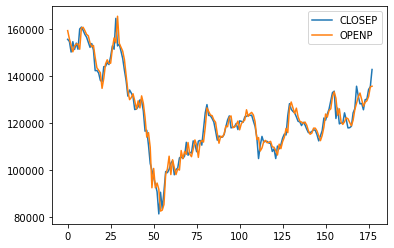

In [ ]:
sels=['CLOSEP','OPENP']
df[sels].plot()
#plt.xlim(50,75)
#plt.ylim(50000,70000)
plt.show()

# 이동평균선
* 주가 기술분석
* 단기 이평선(5일 이평선) 장기 이평선(30일 이평선)을 설정
* 장단기 이평선을 분석
* 골든크로스 (단기 이평선이 장기 이평선을 아래서 위로 통과)
* 데드크로스 (단기 이평선이 장기 이평선을 위에서 아래로 통과)
* 마케팅의 시장평가 지점을 지정

In [ ]:
def makeMV(baseday=5,basedata=df['CLOSEP']):
    res=[]
    # 초기화 하기
    for i in range(baseday-1):
        res.append(0)
    # 이동평균 데이터 만들기
    n=len(basedata)-(baseday-1)
    print("총 데이터수:",len(basedata),"초기화 안되고 채워야할 부분:",n)
    for i in range(n):
        mvdata=np.average(basedata[i:i+baseday])
        res.append(mvdata)
    return res


In [ ]:
df['MV5']=makeMV(5)
df['MV30']=makeMV(30)
df['gsClose']=dfgs['CLOSEP']
df.head()

총 데이터수: 178 초기화 안되고 채워야할 부분: 174
총 데이터수: 178 초기화 안되고 채워야할 부분: 149


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,146500
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,145800
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,143000
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,142000
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,139400


# 경쟁사 분석
* 동종 유사 주가의 경쟁사 분석을 통해 시장기준 주가 분석

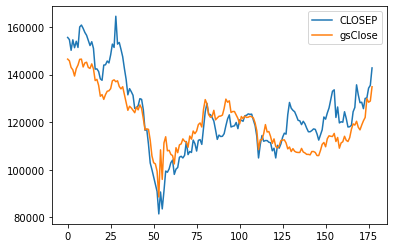

In [ ]:
df[['CLOSEP','gsClose']].plot()
#plt.xlim(0,10)
#plt.ylim(150000,170000)
plt.legend()
plt.show()

### 장단기 크로스 포인트 분석
* 주가 장단기 이평선에 관한 크로스 포인트 분석
* 이를 통해 시장에 반영된 마케팅 기준선을 부여

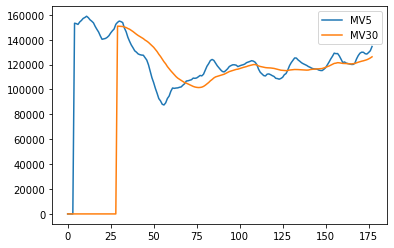

In [ ]:
df[['MV5','MV30']].plot()
#plt.xlim(0,10)
#plt.ylim(150000,170000)
plt.legend()
plt.show()

In [ ]:
short=df['MV5']
long=df['MV30']
res=[]
longday=30
for i in range(longday):
    res.append(0)
    
for i in range(longday,len(short)):
    if(short[i]>long[i]):
        res.append(1)
    else:
        res.append(-1)
df['holdPos']=res
df.head()


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose,holdPos
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,146500,0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,145800,0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,143000,0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,142000,0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,139400,0


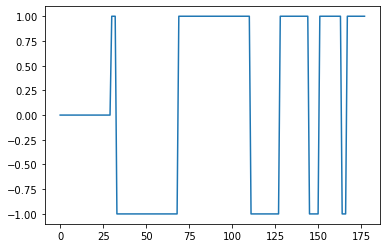

In [ ]:
plt.plot(res)

#### 성장동력과 크로스포인트와의 관계
* 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
* 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득

<ipython-input-71-d6d3f36f37c5>:4: RuntimeWarning: invalid value encountered in double_scalars
  c=((baseData[i]/baseData[i-1])-1)*20
<ipython-input-71-d6d3f36f37c5>:4: RuntimeWarning: divide by zero encountered in double_scalars
  c=((baseData[i]/baseData[i-1])-1)*20


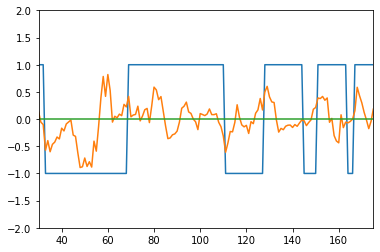

In [ ]:
baseData=df['MV5']
res=[1]
for i in range(1,len(baseData)):
    c=((baseData[i]/baseData[i-1])-1)*20
    res.append(c)
df['holdPos'].plot()
plt.plot(res)
plt.plot([0,175],[0,0])
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()